In [1]:
import sys
sys.path.append('../')

In [2]:
import logging
from stable_baselines import PPO2, logger
from stable_baselines.common.cmd_util import make_atari_env, atari_arg_parser
from stable_baselines.common.vec_env import VecFrameStack, SubprocVecEnv, DummyVecEnv
from stable_baselines.common.policies import CnnPolicy, CnnLstmPolicy, CnnLnLstmPolicy, MlpPolicy

from agents.discrete_agent import DiscreteTrader
from agents.simple_agent import DiscreteTrader as SimpleAgent

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [3]:
logging.getLogger().setLevel(logging.ERROR)

In [4]:
agent_config = {
    'inventory': 2000.0,
    'target_inventory': 0.0, 
    'trade_window': 20 * 60, 
    'impact_param': 10 ** 6, 
    'data_path': '../data/onetick/processed_3/AAPL', 
    'limit_order_level': 2, 
    'is_buy_agent': False, 
    'sampling_freq': 5  # seconds
}

policy = 'mlp'
total_timesteps = 16000 * int(agent_config['trade_window'] / agent_config['sampling_freq'])
nminibatches = 16
n_envs = 2 * nminibatches
n_steps = 100

In [5]:
def train(env_params, total_timesteps, policy,
          n_envs, nminibatches, n_steps, trader, seed=42):
    """
    :param env_params: the environment params at init
    :param total_timesteps: (int) the number of timesteps to run
    :param seed: (int) Used to seed the random generator.
    :param policy: (Object) The policy model to use (MLP, CNN, LSTM, ...)
    :param n_envs: (int) Number of parallel environments
    :param nminibatches: (int) Number of training minibatches per update. For recurrent policies,
        the number of environments run in parallel should be a multiple of nminibatches.
    :param n_steps: (int) The number of steps to run for each environment per update
        (i.e. batch size is n_steps * n_env where n_env is number of environment copies running in parallel)
    """

    # env = VecFrameStack(TraderEnv(env_param),4) # If using stacking
    env = SubprocVecEnv([lambda: trader(**env_params) for _ in range(n_envs)])

#     env = DiscreteTrader(**env_params)
    policy = {'cnn': CnnPolicy, 'lstm': CnnLstmPolicy, 'lnlstm': CnnLnLstmPolicy, 'mlp': MlpPolicy}[policy]
    model = PPO2(policy=policy, env=env, n_steps=n_steps, nminibatches=nminibatches,
                 lam=0.95, gamma=0.99, noptepochs=4, ent_coef=.01,
                 learning_rate=lambda f: f * 2.5e-4, cliprange=lambda f: f * 0.1, verbose=1)
    model.learn(total_timesteps=total_timesteps)
#     env.close()
    # Free memory
    return model

In [ ]:
import time
start = time.time()
model = train(agent_config, total_timesteps, policy, n_envs, nminibatches, n_steps, SimpleAgent)
print(time.time() - start)

[WARNING] | 2020-03-02 02:23:41,462 | From /home/maxlamberti/anaconda3/envs/AFP_ENV/lib/python3.7/site-packages/stable_baselines/common/tf_util.py:58: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



[WARNING] | 2020-03-02 02:23:41,464 | From /home/maxlamberti/anaconda3/envs/AFP_ENV/lib/python3.7/site-packages/stable_baselines/common/tf_util.py:67: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



[WARNING] | 2020-03-02 02:23:41,783 | From /home/maxlamberti/anaconda3/envs/AFP_ENV/lib/python3.7/site-packages/stable_baselines/common/policies.py:115: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.



[WARNING] | 2020-03-02 02:23:41,785 | From /home/maxlamberti/anaconda3/envs/AFP_ENV/lib/python3.7/site-packages/stable_baselines/common/input.py:25: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



Instructions for updating:
Use keras.layers.flatten instead.


[WARNING] | 2020-03-02 02:23:41,789 | From /home/maxlamberti/anaconda3/envs/AFP_ENV/lib/python3.7/site-packages/stable_baselines/common/policies.py:560: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Please use `layer.__call__` method instead.


[WARNING] | 2020-03-02 02:23:41,791 | From /home/maxlamberti/anaconda3/envs/AFP_ENV/lib/python3.7/site-packages/tensorflow_core/python/layers/core.py:332: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.


[WARNING] | 2020-03-02 02:23:41,801 | From /home/maxlamberti/anaconda3/envs/AFP_ENV/lib/python3.7/site-packages/stable_baselines/a2c/utils.py:156: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.



[WARNING] | 2020-03-02 02:23:41,876 | From /home/maxlamberti/anaconda3/envs/AFP_ENV/lib/python3.7/site-packages/stable_baselines/common/distributions.py:326: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



[WARNING] | 2020-03-02 02:23:41,881 | From /home/maxlamberti/anaconda3/envs/AFP_ENV/lib/python3.7/site-packages/stable_baselines/common/distributions.py:327: The name tf.log is deprecated. Please use tf.math.log instead.



[WARNING] | 2020-03-02 02:23:41,999 | From /home/maxlamberti/anaconda3/envs/AFP_ENV/lib/python3.7/site-packages/stable_baselines/ppo2/ppo2.py:194: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.



[WARNING] | 2020-03-02 02:23:42,006 | From /home/maxlamberti/anaconda3/envs/AFP_ENV/lib/python3.7/site-packages/stable_baselines/ppo2/ppo2.py:202: The name tf.trainable_variables is deprecated. Please use tf.compat.v1.trainable_variables instead.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[WARNING] | 2020-03-02 02:23:42,025 | From /home/maxlamberti/anaconda3/envs/AFP_ENV/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[WARNING] | 2020-03-02 02:23:42,191 | From /home/maxlamberti/anaconda3/envs/AFP_ENV/lib/python3.7/site-packages/stable_baselines/ppo2/ppo2.py:210: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.



[WARNING] | 2020-03-02 02:23:42,291 | From /home/maxlamberti/anaconda3/envs/AFP_ENV/lib/python3.7/site-packages/stable_baselines/ppo2/ppo2.py:244: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.



[WARNING] | 2020-03-02 02:23:42,658 | From /home/maxlamberti/anaconda3/envs/AFP_ENV/lib/python3.7/site-packages/stable_baselines/ppo2/ppo2.py:246: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.



---------------------------------------
| approxkl           | 0.00022155311  |
| clipfrac           | 0.0            |
| explained_variance | -1.82          |
| fps                | 426            |
| n_updates          | 1              |
| policy_entropy     | 0.6928606      |
| policy_loss        | -0.00029824016 |
| serial_timesteps   | 100            |
| time_elapsed       | 3.34e-06       |
| total_timesteps    | 3200           |
| value_loss         | 0.035670403    |
---------------------------------------
--------------------------------------
| approxkl           | 0.00044011584 |
| clipfrac           | 0.0052343747  |
| explained_variance | -2.06         |
| fps                | 379           |
| n_updates          | 2             |
| policy_entropy     | 0.6927149     |
| policy_loss        | -0.0009733952 |
| serial_timesteps   | 200           |
| time_elapsed       | 7.5           |
| total_timesteps    | 6400          |
| value_loss         | 0.016610628   |
------------

In [7]:
import sys
sys.path.append('../')

In [ ]:
model.save('../data/agents/rl_agent_v5')

In [10]:
import os
import logging
import numpy as np
from tqdm import tqdm

In [11]:
from simulator.lob import OrderBookSimulator
from scripts.utils.data_loading import get_data_file_paths

In [12]:
logging.getLogger().setLevel(logging.ERROR)

In [14]:
DATA_ROOT = '../data/onetick/test/'
IMPACT_PARAM = 10 ** 8  # large values execute against historic orders
# DURATION = 20 * 60  # in seconds
# SAMPLING_FREQUENCY = 5  # in seconds, dicated by LOB data
# NUM_PERIODS = int(DURATION / SAMPLING_FREQUENCY)

In [15]:
simulation_periods = get_data_file_paths(DATA_ROOT)

### Strategy which places a market sell order every PLACEMENT_FREQUENCY periods

In [16]:
from agents.simple_agent import DiscreteTrader as TempDiscreteTrader

In [18]:
agent_config['data_path'] = '../data/onetick/test/'

In [19]:
env = TempDiscreteTrader(**agent_config)
obs = env.reset()

/home/maxlamberti/anaconda3/envs/AFP_ENV/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [20]:
calc_midprice = lambda x: (x.BID_PRICE.max() + x.ASK_PRICE.min()) / 2

In [21]:
ALL_DATA = {}
NUM_PERIODS = int(agent_config['trade_window'] / agent_config['sampling_freq'])
actions = []

obs = env.reset()
# while True:
#     action, _states = model.predict(obs)
#     obs, rewards, dones, info = env.step(action)

for sim_data_path in tqdm(simulation_periods[:1]):
    
    obs = env.reset()

    for period in range(0, NUM_PERIODS):
        
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        actions.append(action)
    ALL_DATA[sim_data_path] = {}
    ALL_DATA[sim_data_path]['executed_orders'] = env.order_execution_history
    ALL_DATA[sim_data_path]['initial_price'] = env.initial_price
#     ALL_DATA[sim_data_path] = {'price_series': midprice_series, 'executed_orders': order_list}


  0%|          | 0/1 [00:00<?, ?it/s]../simulator/lob.py:198: RuntimeWarning: divide by zero encountered in true_divide
  vol_threshold = top_tick_vol / order['volume']
100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


In [71]:
shortfall_results = []
total_volumes = []
sim_path_arr = []
limit_volume_arr = []
for sim_data_path, sim_results in ALL_DATA.items():
    vol_weighted_price_sum = sum([order['volume'] * order['price'] for order in sim_results['executed_orders']])   
    total_volume = sum([order['volume'] for order in sim_results['executed_orders']])
    if total_volume == 0: 
        continue
    limit_volume_arr.append(sum([order['volume'] for order in sim_results['executed_orders'] if order['type'] == 'limit'])) 
    vwap = vol_weighted_price_sum / total_volume
    shortfall = 100 * (vwap - sim_results['initial_price']) / sim_results['initial_price']
    shortfall_results.append(shortfall)
    total_volumes.append(total_volume)
    sim_path_arr.append(sim_data_path)

In [73]:
shortfall_results = np.array(shortfall_results)
sim_path_arr = np.array(sim_path_arr)
limit_volume_arr = np.array(limit_volume_arr)

print(np.mean(limit_volume_arr[shortfall_results > 200]), np.mean(limit_volume_arr[shortfall_results < 200]))

1131.5238095238096 684.5384615384615


In [69]:
ALL_DATA[sim_path_arr[shortfall_results > 200][0]]

{'executed_orders': [{'type': 'market',
   'volume': 200.0,
   'is_buy': False,
   'execution_time': Timestamp('2012-06-13 12:17:45', freq='5S'),
   'price': 576.2453},
  {'type': 'limit', 'is_buy': False, 'volume': 100.0, 'price': 576.38},
  {'type': 'limit', 'is_buy': False, 'volume': 100.0, 'price': 576.52},
  {'type': 'limit', 'is_buy': False, 'volume': 100.0, 'price': 576.53},
  {'type': 'market',
   'volume': 100.0,
   'is_buy': False,
   'execution_time': Timestamp('2012-06-13 12:18:20', freq='5S'),
   'price': 576.3421000000001},
  {'type': 'market',
   'volume': 200.0,
   'is_buy': False,
   'execution_time': Timestamp('2012-06-13 12:18:50', freq='5S'),
   'price': 576.3139},
  {'type': 'limit', 'is_buy': False, 'volume': 100.0, 'price': 576.48},
  {'type': 'market',
   'volume': 200.0,
   'is_buy': False,
   'execution_time': Timestamp('2012-06-13 12:19:00', freq='5S'),
   'price': 576.4265},
  {'type': 'limit', 'is_buy': False, 'volume': 100.0, 'price': 576.59},
  {'type': '

In [59]:
np.unique(total_volumes)

array([2000., 2001., 2020., 2071., 2080., 2084., 2100., 2165., 2200.])

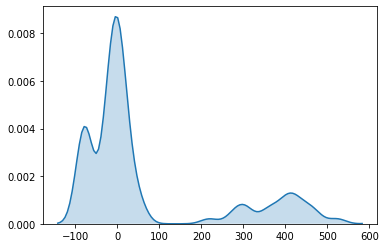

In [62]:
from seaborn import kdeplot
kdeplot(shortfall_results, shade=True)

(array([28., 46.,  4.,  0.,  1.,  1.,  4.,  6.,  6.,  3.]),
 array([-82.6382521 , -22.0021435 ,  38.6339651 ,  99.2700737 ,
        159.9061823 , 220.5422909 , 281.1783995 , 341.8145081 ,
        402.4506167 , 463.0867253 , 523.72283389]),
 <a list of 10 Patch objects>)

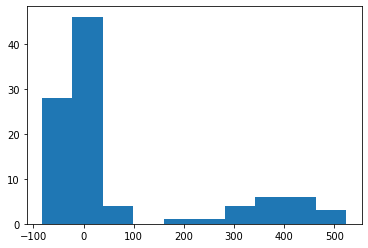

In [63]:
import matplotlib.pyplot as plt
plt.hist(shortfall_results)

In [49]:
mean = np.mean(shortfall_results)
std = np.std(shortfall_results)
se = std / np.sqrt(len(shortfall_results))
print('Mean Shortfall: %.4f bps +/- %.4f bps' % (100 * mean, 100 * se))
print('StDev Shortfall: %.4f bps' % 100 * std)

Mean Shortfall: 7347.3062 bps +/- 1349.6461 bps


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

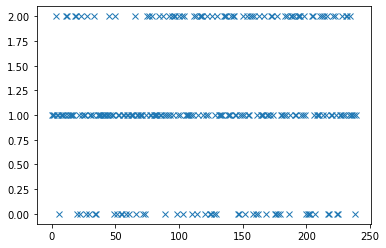

In [22]:
import matplotlib.pyplot as plt
plt.plot(actions, 'x')

(array([ 48.,   0.,   0.,   0.,   0., 124.,   0.,   0.,   0.,  68.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

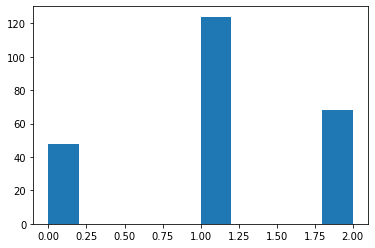

In [23]:
plt.hist(actions)

In [30]:
[order['volume'] for order in env.order_execution_history]

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 200.0,
 200.0,
 2,
 76,
 200.0,
 3,
 200.0,
 1,
 200.0,
 200.0,
 200.0,
 18.0]

In [23]:
env.order_execution_history

[]

In [24]:
ALL_DATA

{'../data/onetick/processed_2/AAPL/2012-01-03 10:35:00': {'executed_orders': [],
  'initial_price': 574.5699999999999}}